In [2]:
import numpy as np
import pandas as pd

In [3]:
!pip install netCDF4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 44.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 42.0 MB/s eta 0:00:00


In [39]:
import xarray as xr

nc_file = '/kaggle/input/iiser-project-data-ees/data.nc'
dataset = xr.open_dataset(nc_file)

# metadata
print(dataset)

<xarray.Dataset> Size: 85MB
Dimensions:    (longitude: 17, latitude: 11, time: 4392)
Coordinates:
  * longitude  (longitude) float32 68B 77.2 77.45 77.7 77.95 ... 80.7 80.95 81.2
  * latitude   (latitude) float32 44B 31.3 31.05 30.8 30.55 ... 29.3 29.05 28.8
  * time       (time) datetime64[ns] 35kB 2013-04-01 ... 2013-09-30T23:00:00
Data variables: (12/13)
    t2m        (time, latitude, longitude) float64 7MB ...
    cbh        (time, latitude, longitude) float64 7MB ...
    hcc        (time, latitude, longitude) float64 7MB ...
    lcc        (time, latitude, longitude) float64 7MB ...
    msl        (time, latitude, longitude) float64 7MB ...
    mcc        (time, latitude, longitude) float64 7MB ...
    ...         ...
    sp         (time, latitude, longitude) float64 7MB ...
    sshf       (time, latitude, longitude) float64 7MB ...
    tcc        (time, latitude, longitude) float64 7MB ...
    tciw       (time, latitude, longitude) float64 7MB ...
    tclw       (time, latitude

In [40]:
data_vars = dataset.data_vars
num_variables = len(data_vars)
print("Number of variables:", num_variables)
data_vars

Number of variables: 13


Data variables:
    t2m      (time, latitude, longitude) float64 7MB ...
    cbh      (time, latitude, longitude) float64 7MB ...
    hcc      (time, latitude, longitude) float64 7MB ...
    lcc      (time, latitude, longitude) float64 7MB ...
    msl      (time, latitude, longitude) float64 7MB ...
    mcc      (time, latitude, longitude) float64 7MB ...
    slhf     (time, latitude, longitude) float64 7MB ...
    sp       (time, latitude, longitude) float64 7MB ...
    sshf     (time, latitude, longitude) float64 7MB ...
    tcc      (time, latitude, longitude) float64 7MB ...
    tciw     (time, latitude, longitude) float64 7MB ...
    tclw     (time, latitude, longitude) float64 7MB ...
    tp       (time, latitude, longitude) float64 7MB ...

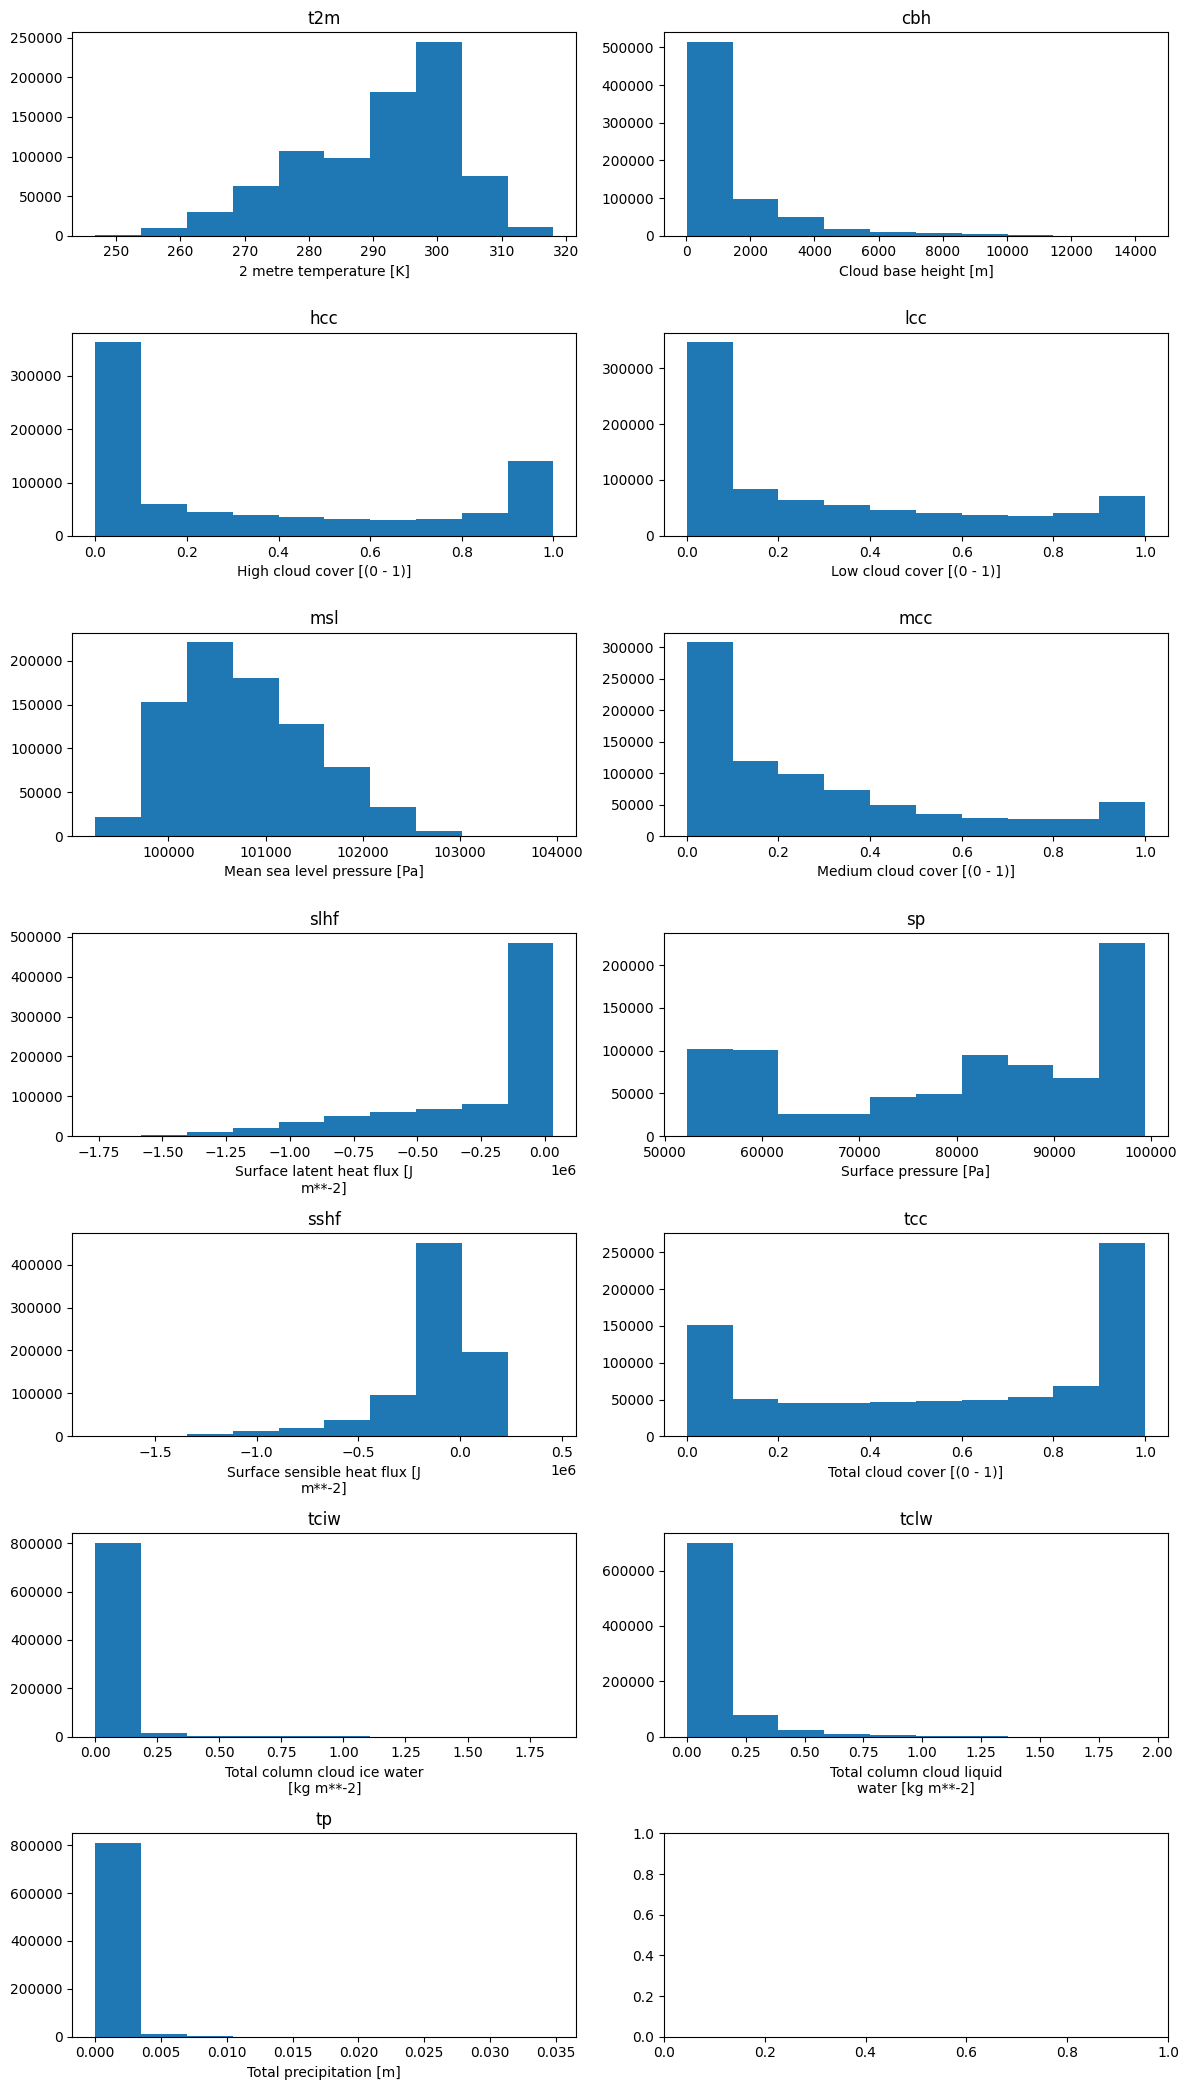

In [41]:
import matplotlib.pyplot as plt

data_vars = dataset.data_vars
num_variables = len(data_vars)

num_cols = 2 
num_rows = (num_variables + num_cols - 1) // num_cols 

fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 3*num_rows))

for i, var_name in enumerate(data_vars):
    row = i // num_cols
    col = i % num_cols
    var_data = data_vars[var_name]
    var_data.plot(ax=axs[row, col])
    axs[row, col].set_title(var_name)

plt.tight_layout()
plt.show()

In [42]:
len(dataset.coords['time'])

4392

In [43]:
tp=data_vars["tp"]

In [44]:
import xarray as xr
import pandas as pd

data_vars = dataset.data_vars
time_series = {}

for var in data_vars:
    time_series[var] = dataset[var].mean(dim=('latitude', 'longitude')).to_series()

df = pd.DataFrame(time_series)

In [45]:
# Set the time as the index
df.index = pd.to_datetime(df.index)
df = df.sort_index() 
df

,t2m,cbh,hcc,lcc,msl,mcc,slhf,sp,sshf,tcc,tciw,tclw,tp
time,,,,,,,,,,,,,
2013-04-01 00:00:00,277.557286,993.271011,0.000000,0.111965,101406.024484,0.015405,-4708.431520,80235.106932,23626.860150,0.121695,0.000102,0.004660,5.454105e-07
2013-04-01 01:00:00,277.674502,1074.281289,0.000000,0.103391,101452.843449,0.013267,-6368.053999,80269.097426,21416.226994,0.112833,0.000108,0.004142,7.016479e-07
2013-04-01 02:00:00,279.714486,1112.203507,0.000000,0.095786,101508.502139,0.010417,-55317.748352,80314.784773,-14496.630499,0.103953,0.000103,0.003229,6.902852e-07
2013-04-01 03:00:00,283.512057,1209.058079,0.000000,0.080642,101579.213410,0.010736,-205080.889654,80376.807711,-123910.465658,0.087280,0.000084,0.002639,4.118986e-07
2013-04-01 04:00:00,285.260764,840.676315,0.000000,0.052763,101574.805281,0.007218,-383343.092226,80396.089633,-277784.694630,0.058197,0.000136,0.003307,3.209968e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-09-30 19:00:00,287.620700,1041.883254,0.148640,0.348879,101303.776892,0.261247,-12793.241424,80384.450476,1856.169645,0.608611,0.009056,0.093617,9.707171e-05
2013-09-30 20:00:00,287.123050,895.337389,0.136557,0.362765,101283.374002,0.288120,-13149.576879,80358.375840,1633.635026,0.624861,0.008241,0.099422,8.066678e-05
2013-09-30 21:00:00,287.108038,803.404513,0.119510,0.350475,101283.176256,0.301823,-12903.706882,80352.637036,1303.511356,0.605299,0.006047,0.103902,1.045825e-04


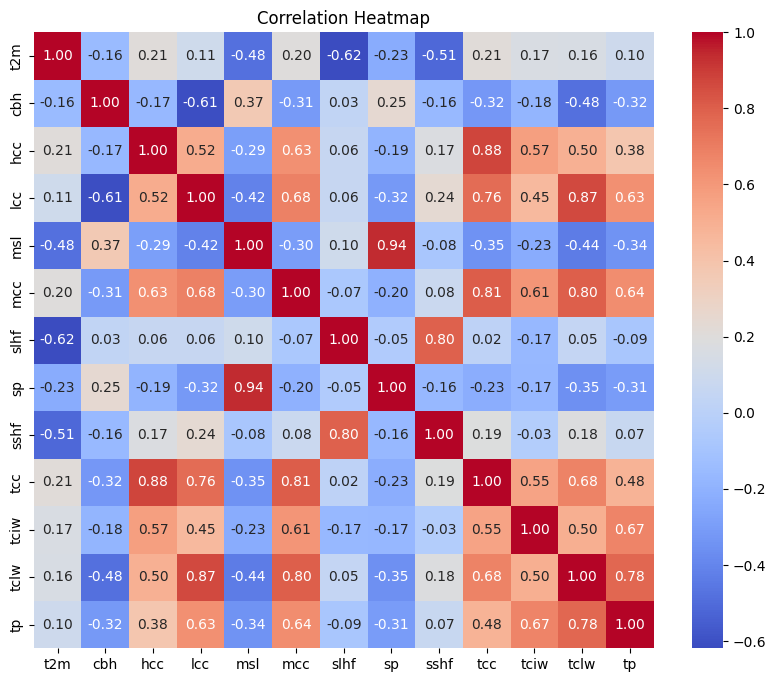

In [46]:
import seaborn as sns

correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

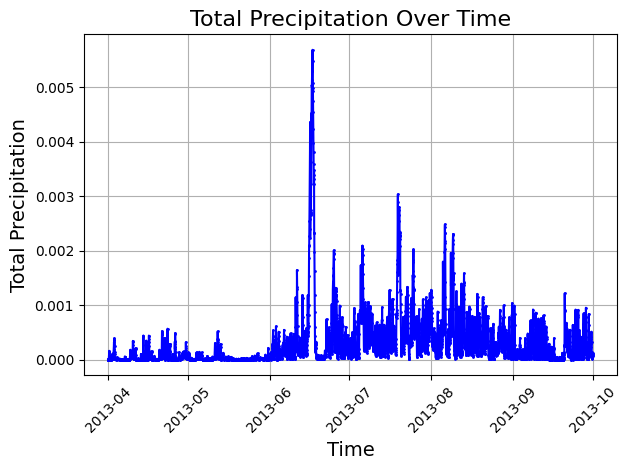

In [47]:
tp_agg = df.groupby('time')['tp'].mean()

plt.plot(tp_agg.index, tp_agg, linestyle='-', color='b', marker='o', markersize=1, label='Total Precipitation')
plt.title('Total Precipitation Over Time', fontsize=16)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Total Precipitation', fontsize=14)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [48]:
import pandas as pd
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

def create_lagged_features(data, lags=5):
    df_lagged = data.copy()
    lagged_columns = []
    for var in data.columns:
        if var == 'tp':
            continue
        lagged_vars = [data[var].shift(lag) for lag in range(1, lags + 1)]
        lagged_columns.extend([f'{var}_lag{lag}' for lag in range(1, lags + 1)])
        df_lagged = pd.concat([df_lagged] + lagged_vars, axis=1)
    df_lagged.dropna(inplace=True)
    df_lagged.columns = data.columns.tolist() + lagged_columns
    return df_lagged

In [49]:
lags = 10
df_lagged = create_lagged_features(df, lags=lags)

train_size = int(len(df_lagged) * 0.8)
train, test = df_lagged[:train_size], df_lagged[train_size:]

X_train, y_train = train.drop(columns='tp'), train['tp']
X_test, y_test = test.drop(columns='tp'), test['tp']

In [50]:
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000, learning_rate=0.01, max_depth=5)
model.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=50, verbose=False)

y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE: {rmse}')

/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


RMSE: 0.00012341470239793175


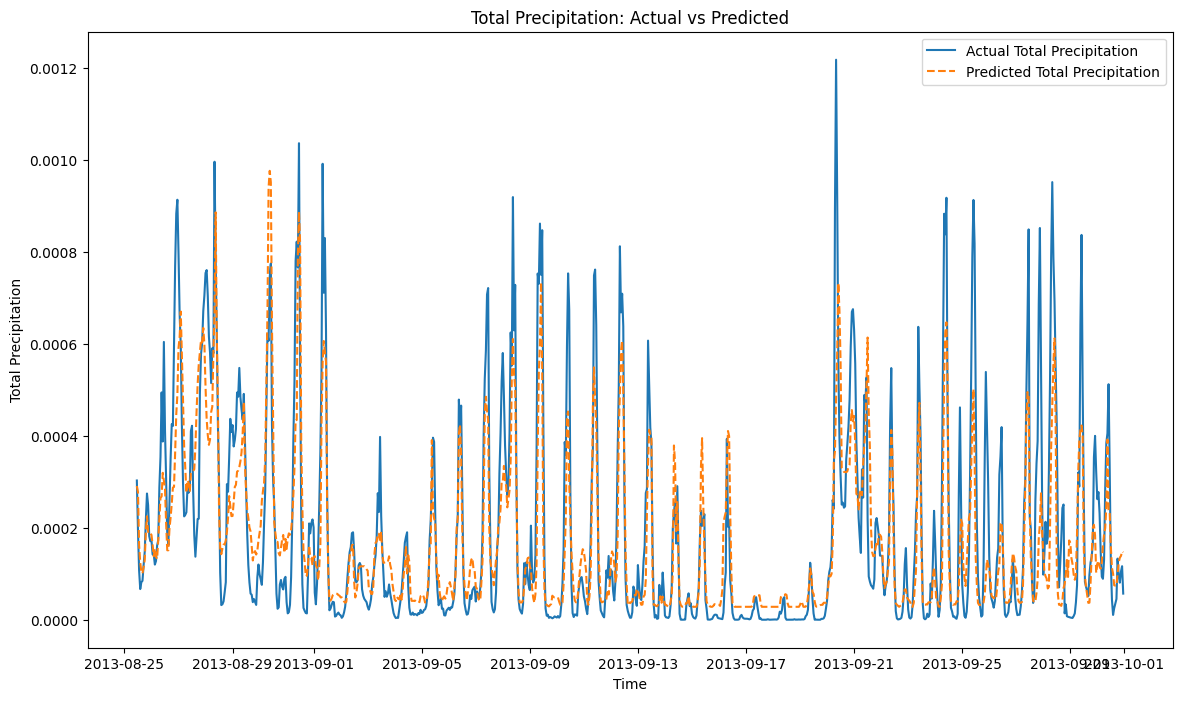

In [51]:
# Plot actual vs predicted values
plt.figure(figsize=(14, 8))
plt.plot(test.index, y_test, label='Actual Total Precipitation')
plt.plot(test.index, y_pred, label='Predicted Total Precipitation', linestyle='dashed')
plt.title('Total Precipitation: Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Total Precipitation')
plt.legend()
plt.show()

# Unseen data

In [52]:
# Load the test dataset
nc_file = '/kaggle/input/test-data-ees/TEST.nc'
test_dataset = xr.open_dataset(nc_file)

data_vars = test_dataset.data_vars
time_series = {}

for var in data_vars:
    time_series[var] = test_dataset[var].mean(dim=('latitude', 'longitude')).to_series()

test_df = pd.DataFrame(time_series)

In [60]:
lags = 10
test_df_lagged = create_lagged_features(test_df, lags=lags)

X_test = test_df_lagged.drop(columns=['tp'])

In [62]:
list(X_test.columns)

['t2m',
 'cbh',
 'hcc',
 'lcc',
 'msl',
 'mcc',
 'slhf',
 'sp',
 'sshf',
 'tcc',
 'tciw',
 'tclw',
 't2m_lag1',
 't2m_lag2',
 't2m_lag3',
 't2m_lag4',
 't2m_lag5',
 't2m_lag6',
 't2m_lag7',
 't2m_lag8',
 't2m_lag9',
 't2m_lag10',
 'cbh_lag1',
 'cbh_lag2',
 'cbh_lag3',
 'cbh_lag4',
 'cbh_lag5',
 'cbh_lag6',
 'cbh_lag7',
 'cbh_lag8',
 'cbh_lag9',
 'cbh_lag10',
 'hcc_lag1',
 'hcc_lag2',
 'hcc_lag3',
 'hcc_lag4',
 'hcc_lag5',
 'hcc_lag6',
 'hcc_lag7',
 'hcc_lag8',
 'hcc_lag9',
 'hcc_lag10',
 'lcc_lag1',
 'lcc_lag2',
 'lcc_lag3',
 'lcc_lag4',
 'lcc_lag5',
 'lcc_lag6',
 'lcc_lag7',
 'lcc_lag8',
 'lcc_lag9',
 'lcc_lag10',
 'msl_lag1',
 'msl_lag2',
 'msl_lag3',
 'msl_lag4',
 'msl_lag5',
 'msl_lag6',
 'msl_lag7',
 'msl_lag8',
 'msl_lag9',
 'msl_lag10',
 'mcc_lag1',
 'mcc_lag2',
 'mcc_lag3',
 'mcc_lag4',
 'mcc_lag5',
 'mcc_lag6',
 'mcc_lag7',
 'mcc_lag8',
 'mcc_lag9',
 'mcc_lag10',
 'slhf_lag1',
 'slhf_lag2',
 'slhf_lag3',
 'slhf_lag4',
 'slhf_lag5',
 'slhf_lag6',
 'slhf_lag7',
 'slhf_lag8',
 's

RMSE: 0.00012127168485039043


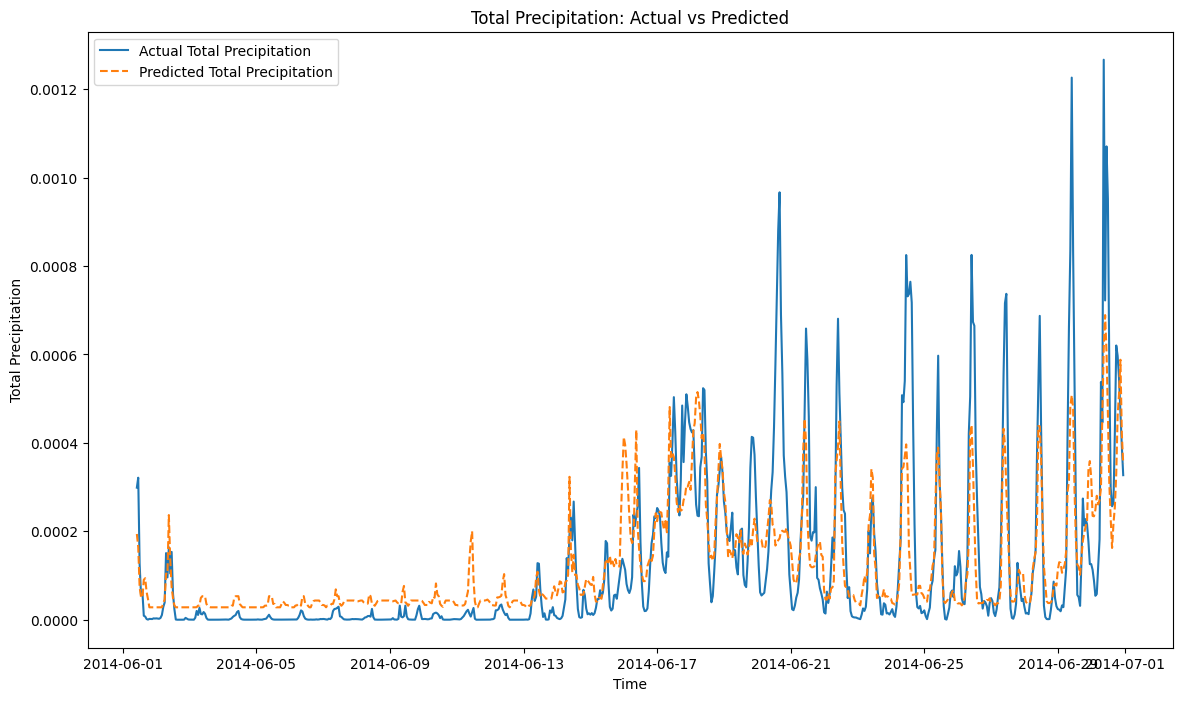

In [63]:
tp_predictions = model.predict(X_test)

if 'tp' in test_df_lagged.columns:
    y_test = test_df_lagged['tp']
    rmse = mean_squared_error(y_test, tp_predictions, squared=False)
    print(f'RMSE: {rmse}')
    
    plt.figure(figsize=(14, 8))
    plt.plot(y_test.index, y_test, label='Actual Total Precipitation')
    plt.plot(y_test.index, tp_predictions, label='Predicted Total Precipitation', linestyle='dashed')
    plt.title('Total Precipitation: Actual vs Predicted')
    plt.xlabel('Time')
    plt.ylabel('Total Precipitation')
    plt.legend()
    plt.show()

# Train data for a specific time period

In [54]:
# Define the desired time range
start_date = '2013-06-01'
end_date = '2024-07-10'

train_df_filtered = df[start_date:end_date]

lags = 10
train_df_lagged = create_lagged_features(train_df_filtered, lags=lags)

X_train = train_df_lagged.drop(columns=['tp'])
y_train = train_df_lagged['tp']


tp_predictions = model.predict(X_train)
rmse = mean_squared_error(y_train, tp_predictions, squared=False)

RMSE: 0.00014434708353259785


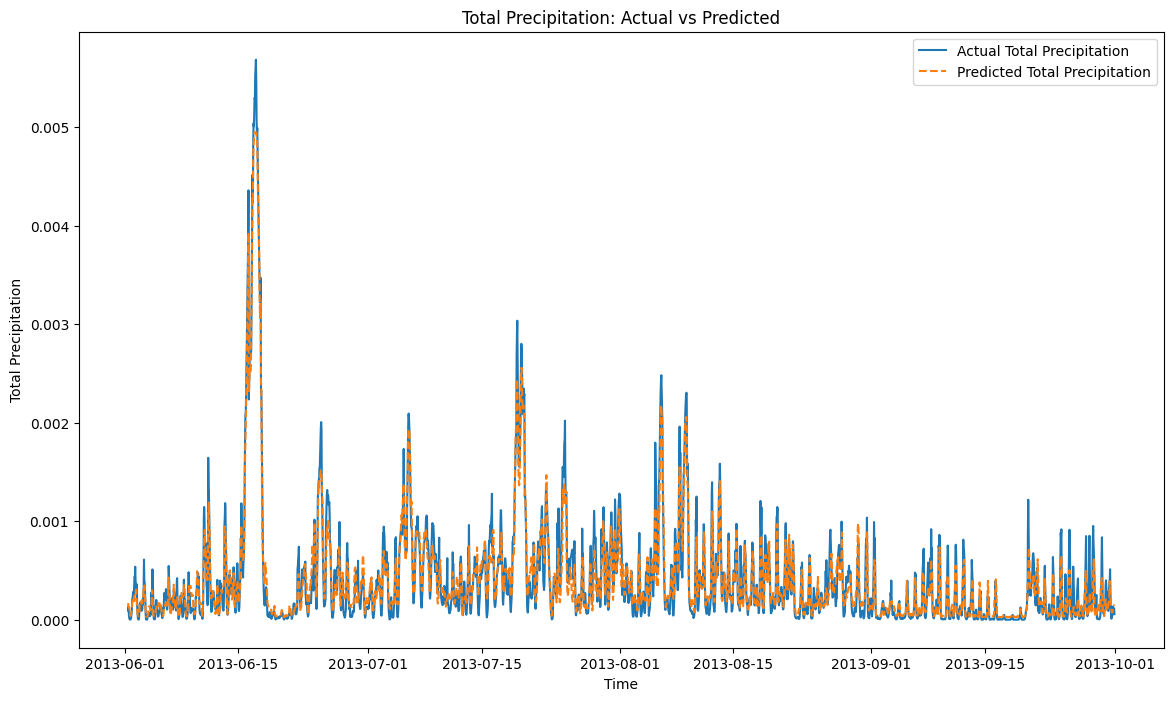

In [55]:
print(f'RMSE: {rmse}')
plt.figure(figsize=(14, 8))
plt.plot(y_train.index, y_train, label='Actual Total Precipitation')
plt.plot(y_train.index, tp_predictions, label='Predicted Total Precipitation', linestyle='dashed')
plt.title('Total Precipitation: Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Total Precipitation')
plt.legend()
plt.show()